<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [51]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

   Resolving package versions...
  No Changes to `C:\Users\ahsra\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\ahsra\.julia\environments\v1.8\Manifest.toml`


In [53]:
import SpecialFunctions
import Plots
import Random

In [54]:
function sample_gaussian(𝜇, 𝜎, n)
    sample = zeros(n)
    for i in 1:n
        rand_number_1 = rand()
        rand_number_2 = rand()
        box_muller_transform = sqrt(-2 .* log(rand_number_1)) .* cos(2 .* π .* rand_number_2)
        norm_dist = box_muller_transform .* 𝜎 .+ 𝜇
        sample[i] = norm_dist
    end
    return sample
end

sample_gaussian (generic function with 1 method)

In [ ]:
# Resources used: https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform 
# https://www.baeldung.com/cs/uniform-to-normal-distribution

# 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

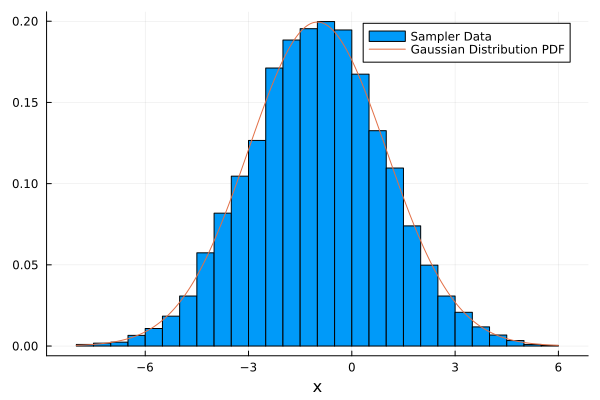

In [58]:
import Distributions
using Plots
using Random
import Distributions as di
using Distributions
sampler_data = sample_gaussian(-1, 2, 10000)
histogram(sampler_data, label = "Sampler Data", normalize=:true)
x = -8:0.001:6;
temp = di.Normal(-1, 2)
norm_pdf = di.pdf.(temp, x)
plot!(x, norm_pdf, label = "Gaussian Distribution PDF", xlabel = "x")